In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels
import scikit_posthocs as sp
import sys
import scipy
import matplotlib.colors as colors


In [70]:
glom_volume = pd.read_csv("../csvs/fly_glomeruli_volume.csv")
glom_volume_single_uPN = pd.read_csv("../csvs/fly_glomeruli_volume_feedforward_single_uPN.csv")

In [71]:
#label each glomerulus appropriately 
glom_volume['glom_pn_type'] = ['single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs',
                            'multiple uPNs', 'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs',
                            'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs',
                            'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs', 'single uPN','single uPN','single uPN']

glom_volume_single_uPN['glom_pn_type'] = ['single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','multiple uPNs', 'single uPN']   

In [72]:
#This CSV is created by retrieve_neuron_data.ipynb
rec_synapse_density_data = pd.read_csv('../csvs/recurrent_synapse_density_data.csv')

In [73]:
#converts wide table to long table format for plotting
rec_synapse_density_data_long = pd.melt(rec_synapse_density_data)
rec_synapse_density_data_long = rec_synapse_density_data_long[rec_synapse_density_data_long['value'].notna()]

In [74]:
#populates columns based on glomerulus type for plotting
hue_list_synapse_density = [] 
for row in rec_synapse_density_data_long.iterrows():
    glom = row[1]['variable']
    hue_list_synapse_density.append(glom_volume.loc[glom_volume['glomerulus'] == glom]['glom_pn_type'].values[0]) 

rec_synapse_density_data_long['glomerulus type'] = hue_list_synapse_density
rec_synapse_density_data_long['color'] = rec_synapse_density_data_long['glomerulus type']

rec_synapse_density_data_long = rec_synapse_density_data_long[(rec_synapse_density_data_long['variable']!= 'Glomerulus 2')
                                                                                  & (rec_synapse_density_data_long['variable']!= 'Glomerulus 3')]

glom1_index = rec_synapse_density_data_long.loc[rec_synapse_density_data_long['variable'] == 'Glomerulus 1'].index
glomV_index = rec_synapse_density_data_long.loc[rec_synapse_density_data_long['variable'] == 'V'].index

for cell_index in glom1_index: 
    rec_synapse_density_data_long.at[cell_index,'color'] = 'Glomerulus 1'
for cell_index in glomV_index: 
    rec_synapse_density_data_long.at[cell_index,'color'] = 'V'    

In [75]:
#post hoc tests
uncorrected_recurrent_synapse_density_post_hoc_all = sp.posthoc_mannwhitney(rec_synapse_density_data_long,val_col='value',group_col='variable')

synapse_density_correction_results_all = statsmodels.stats.multitest.multipletests(uncorrected_recurrent_synapse_density_post_hoc_all['Glomerulus 1'], alpha=0.05, method='bonferroni')
corrected_recurrent_synapse_density_post_hoc_all = pd.DataFrame({'Glomerulus': list(uncorrected_recurrent_synapse_density_post_hoc_all['Glomerulus 1'].index),
                                               'significant': synapse_density_correction_results_all[0],
                                               'uncorrected_p_value': uncorrected_recurrent_synapse_density_post_hoc_all['Glomerulus 1'],
                                               'corrected p_value':synapse_density_correction_results_all[1]})
corrected_recurrent_synapse_density_post_hoc_all

,Glomerulus,significant,uncorrected_p_value,corrected p_value
D,D,True,7.305626e-05,0.003799
DA1,DA1,True,1.888149e-06,0.000098
DA2,DA2,True,3.428434e-04,0.017828
DA3,DA3,True,1.346238e-04,0.007000
DA4l,DA4l,True,2.145303e-05,0.001116
DA4m,DA4m,True,6.291748e-04,0.032717
DC1,DC1,True,2.012005e-04,0.010462
DC2,DC2,True,4.570593e-05,0.002377
DC3,DC3,True,6.225962e-05,0.003238
DC4,DC4,True,1.241545e-04,0.006456


In [76]:
recurrent_density_data_long_only_glom_1_medians = rec_synapse_density_data_long.groupby(by=["variable"])["value"].median()
recurrent_density_data_long_only_glom_1_medians = abs(recurrent_density_data_long_only_glom_1_medians - recurrent_density_data_long_only_glom_1_medians['Glomerulus 1'])
recurrent_density_data_medians = pd.DataFrame(recurrent_density_data_long_only_glom_1_medians)
recurrent_density_data_medians['Glomerulus'] = recurrent_density_data_medians.index
recurrent_density_data_medians['p_value']= corrected_recurrent_synapse_density_post_hoc_all['corrected p_value']
recurrent_density_data_medians

,value,Glomerulus,p_value
variable,,,
D,0.033928,D,0.003799
DA1,0.053523,DA1,0.000098
DA2,0.054479,DA2,0.017828
DA3,0.054423,DA3,0.007000
DA4l,0.052764,DA4l,0.001116
DA4m,0.050503,DA4m,0.032717
DC1,0.037688,DC1,0.010462
DC2,0.045380,DC2,0.002377
DC3,0.055465,DC3,0.003238


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

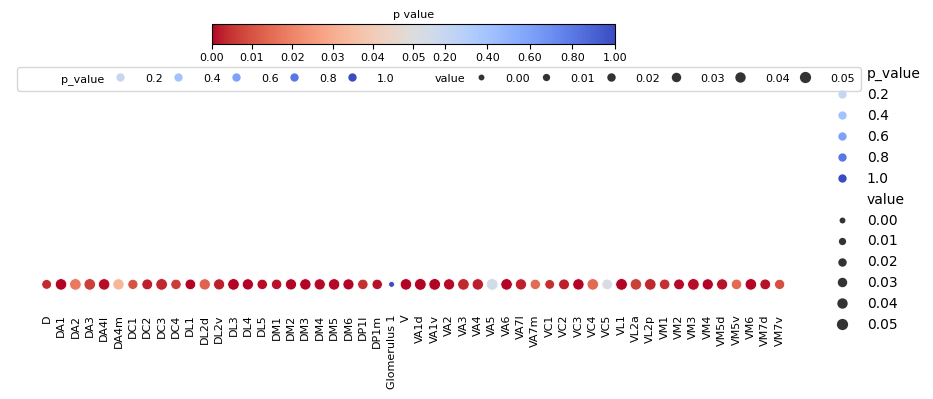

In [77]:
divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=.05, vmax=1)
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("coolwarm", as_cmap=True).reversed(),norm=divnorm)

ax = sns.relplot(data = recurrent_density_data_medians, y = [0.75] * 52, x='Glomerulus',size='value',
            #sizes=relplot_sizing(in_volume_cable_length_medians['value'],10,25),
            #size_order = list(range(len(in_volume_cable_length_medians['sizing']))),
            palette=sns.color_palette("coolwarm", as_cmap=True).reversed() ,hue='p_value',hue_norm=divnorm,height=4, aspect=18/8)
plt.ylim(0.75,1.25)
plt.xticks(rotation=90)
plt.xticks(fontsize=8, fontname="Liberation Sans")
plt.tick_params(left=False,bottom=False)
ax.set_yticklabels([])
ax.set_xlabels("")
legend = plt.legend(loc="upper left", ncol=13, columnspacing=0.10,frameon=None)
for text in legend.texts: 
    text.set_fontsize(8)

cbar = ax.figure.colorbar(sm,ax=plt.gca(),ticks = [0, 0.01,0.02,0.03,0.04,0.05, 0.2, 0.4, 0.6, 0.8, 1],
                          fraction=.2,shrink=0.5,orientation='horizontal',
                          location='top')#,norm=colors.TwoSlopeNorm(vmin=min(in_volume_cable_length_medians['p_value']), vcenter=.05, vmax=max(in_volume_cable_length_medians['p_value'])))#,values=divnorm(in_volume_cable_length_medians['p_value']))
cbar.ax.tick_params(labelsize=8) 
cbar.ax.xaxis.set_ticks_position("bottom")
cbar.set_label('p value', size=8)
#cbar.ax.set_yscale('linear')

sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)

plt.savefig('../svgs/recurrent_density_only_glom_1_relplot.svg', format="svg")
plt.show()